In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision.transforms.transforms import ToTensor,ToPILImage

In [2]:
import torchvision
print(torchvision.transforms.transforms.__all__)

['Compose', 'ToTensor', 'PILToTensor', 'ConvertImageDtype', 'ToPILImage', 'Normalize', 'Resize', 'Scale', 'CenterCrop', 'Pad', 'Lambda', 'RandomApply', 'RandomChoice', 'RandomOrder', 'RandomCrop', 'RandomHorizontalFlip', 'RandomVerticalFlip', 'RandomResizedCrop', 'RandomSizedCrop', 'FiveCrop', 'TenCrop', 'LinearTransformation', 'ColorJitter', 'RandomRotation', 'RandomAffine', 'Grayscale', 'RandomGrayscale', 'RandomPerspective', 'RandomErasing', 'GaussianBlur', 'InterpolationMode', 'RandomInvert', 'RandomPosterize', 'RandomSolarize', 'RandomAdjustSharpness', 'RandomAutocontrast', 'RandomEqualize']


## 一、OpenCV

### 1、读取图像

In [3]:
img_color = cv.imread('Amber.jpg',cv.IMREAD_COLOR)
img_gary = cv.imread('Amber.jpg',cv.IMREAD_GRAYSCALE)

### 2、显示图像

In [3]:
cv.imshow('Amber_color',img_color)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
print(img_color.__class__, img_color.shape, img_gary.shape)
print(np.min(img_color), np.max(img_color))

<class 'numpy.ndarray'> (1080, 2054, 3) (1080, 2054)
0 255


plt是RGB通道，opencv是BGR通道，用plt显示图片需要翻转一下

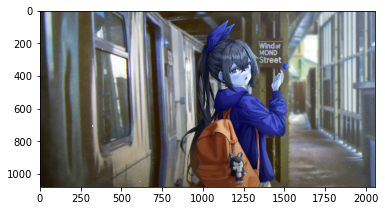

In [5]:
plt.imshow(img_color)

b = a[i:j:s]表示复制a[i]到a[j-1]，s表示步进，缺省为1.
所以a[i:j:1]相当于a[i:j]
当s<0时，i缺省时，默认为-1. j缺省时，默认为-len(a)-1
所以a[::-1]相当于 a[-1:-len(a)-1:-1]，也就是从最后一个元素到第一个元素复制一遍，即倒序

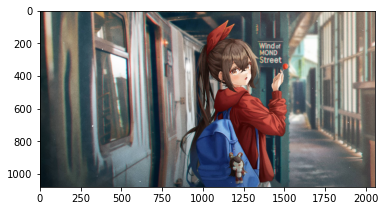

In [6]:
plt.imshow(img_color[:,:,::-1])

### 3、保存图像

In [7]:
cv.imwrite('Amber_copy.png',img_color)

True

## 二、PIL

### 1、读取图像

In [8]:
img = Image.open('Amber.jpg')

### 2、显示图像

In [9]:
print(img.__class__,img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'> (2054, 1080)


In [10]:
img_array = np.array(img)

In [11]:
print(img_array.__class__, img_array.shape)
print(np.min(img_array), np.max(img_array))

<class 'numpy.ndarray'> (1080, 2054, 3)
0 255


PIL.Image读取时是RGB通道

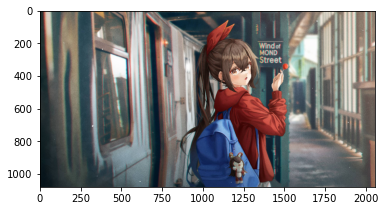

In [12]:
plt.imshow(img_array)

### 3、保存图像

In [18]:
img.save('Amber_copy_PIL.png')

## 三、转化为Tensor

### 1、numpy.ndarray转化为Tensor

In [64]:
img_tensor_from_np = ToTensor()(img_color).to(device='cuda:0')

ToTensor将图片像素值转到了 [0, 1], 并且调整了通道的位置

In [65]:
print(img_color.__class__,img_color.shape)
print(img_tensor_from_np.__class__, img_tensor_from_np.shape)
print(torch.min(img_tensor_from_np), torch.max(img_tensor_from_np))

<class 'numpy.ndarray'> (1080, 2054, 3)
<class 'torch.Tensor'> torch.Size([3, 1080, 2054])
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


但是没有解决OpenCV读取是BGR通道的问题

In [66]:
img_from_Tensor_to_PIL = ToPILImage()(img_tensor_from_np.cpu())
img_from_Tensor_to_PIL.save('Amber_copy.png')

In [74]:
img_from_Tensor_to_np = np.uint8(img_tensor_from_np.cpu().detach().numpy()*255).transpose(1,2,0)
print(img_from_Tensor_to_np.__class__, img_from_Tensor_to_np.shape)
print(np.min(img_from_Tensor_to_np), np.max(img_from_Tensor_to_np))
cv.imwrite('Amber_copy.png',img_from_Tensor_to_np)

<class 'numpy.ndarray'> (1080, 2054, 3)
0 255


True

### 2、PIL与Tensor相互转化

In [28]:
img_tensor_from_PIL = ToTensor()(img).to(device='cuda:0')

ToTensor将图片像素值转到了 [0, 1]

In [35]:
print(img_tensor_from_PIL.__class__, img_tensor_from_PIL.shape)
print(torch.min(img_tensor_from_PIL), torch.max(img_tensor_from_PIL))

<class 'torch.Tensor'> torch.Size([3, 1080, 2054])
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


自行转为np.array再转为PIL.Image

In [39]:
img_tensor_from_PIL_array = img_tensor_from_PIL.cpu().detach().numpy()

In [40]:
print(img_tensor_from_PIL_array.__class__, img_tensor_from_PIL_array.shape)
print(np.min(img_tensor_from_PIL_array), np.max(img_tensor_from_PIL_array))

<class 'numpy.ndarray'> (3, 1080, 2054)
0.0 1.0


In [38]:
img_tensor_from_PIL_array = img_tensor_from_PIL_array.transpose((1,2,0))
img_tensor_from_PIL_array_PIL = Image.fromarray(np.uint8(img_tensor_from_PIL_array*255))
img_tensor_from_PIL_array_PIL.save('Amber_copy.png')

ToPILImage, 自动完成了上面的工作

In [42]:
img_from_Tensor_to_PIL = ToPILImage()(img_tensor_from_PIL.cpu())
img_from_Tensor_to_PIL.save('Amber_copy.png')